In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("heart_disease_dataset.csv")
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [4]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes

df['Exercise Habits']=df['Exercise Habits'].astype('category')
df['Exercise Habits']=df['Exercise Habits'].cat.codes

df['Smoking']=df['Smoking'].astype('category')
df['Smoking']=df['Smoking'].cat.codes

df['Family Heart Disease']=df['Family Heart Disease'].astype('category')
df['Family Heart Disease']=df['Family Heart Disease'].cat.codes

df['Diabetes']=df['Diabetes'].astype('category')
df['Diabetes']=df['Diabetes'].cat.codes

df['High Blood Pressure']=df['High Blood Pressure'].astype('category')
df['High Blood Pressure']=df['High Blood Pressure'].cat.codes

df['Low HDL Cholesterol']=df['Low HDL Cholesterol'].astype('category')
df['Low HDL Cholesterol']=df['Low HDL Cholesterol'].cat.codes

df['High LDL Cholesterol']=df['High LDL Cholesterol'].astype('category')
df['High LDL Cholesterol']=df['High LDL Cholesterol'].cat.codes

df['Alcohol Consumption']=df['Alcohol Consumption'].astype('category')
df['Alcohol Consumption']=df['Alcohol Consumption'].cat.codes

df['Stress Level']=df['Stress Level'].astype('category')
df['Stress Level']=df['Stress Level'].cat.codes

df['Sugar Consumption']=df['Sugar Consumption'].astype('category')
df['Sugar Consumption']=df['Sugar Consumption'].cat.codes

df['Heart Disease Status']=df['Heart Disease Status'].astype('category')
df['Heart Disease Status']=df['Heart Disease Status'].cat.codes

df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,0,1,1,0,24.991591,1,...,0,0,2,7.633228,2,342.0,NaN,12.969246,12.387250,0
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.0,10.381259,8.153887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,2,1,0,0,18.788791,1,...,1,2,0,6.834954,2,343.0,133.0,3.588814,19.132004,1
9996,38.0,1,172.0,154.0,2,0,0,0,31.856801,1,...,1,-1,0,8.247784,1,377.0,83.0,2.658267,9.715709,1
9997,73.0,1,152.0,201.0,0,1,0,1,26.899911,0,...,1,-1,1,4.436762,1,248.0,88.0,4.408867,9.492429,1
9998,23.0,1,142.0,299.0,1,1,0,1,34.964026,1,...,1,2,0,8.526329,2,113.0,153.0,7.215634,11.873486,1


In [5]:
df['Gender'] = df['Gender'].replace(-1, np.nan)
df['Exercise Habits'] = df['Exercise Habits'].replace(-1, np.nan)
df['Smoking'] = df['Smoking'].replace(-1, np.nan)
df['Family Heart Disease'] = df['Family Heart Disease'].replace(-1, np.nan)
df['Diabetes'] = df['Diabetes'].replace(-1, np.nan)
df['High Blood Pressure'] = df['High Blood Pressure'].replace(-1, np.nan)
df['Low HDL Cholesterol'] = df['Low HDL Cholesterol'].replace(-1, np.nan)
df['High LDL Cholesterol'] = df['High LDL Cholesterol'].replace(-1, np.nan)
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace(-1, np.nan)
df['Stress Level'] = df['Stress Level'].replace(-1, np.nan)
df['Sugar Consumption'] = df['Sugar Consumption'].replace(-1, np.nan)
df['Heart Disease Status'] = df['Heart Disease Status'].replace(-1, np.nan)

In [6]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [7]:
df=df.dropna()
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,0.0,146.0,286.0,0.0,0.0,1.0,1.0,25.221799,0.0,...,0.0,2.0,0.0,8.744034,2.0,133.0,157.0,9.355389,19.298875,0
2,46.0,1.0,126.0,216.0,1.0,0.0,0.0,0.0,29.855447,0.0,...,1.0,1.0,1.0,4.440440,1.0,393.0,92.0,12.709873,11.230926,0
3,32.0,0.0,122.0,293.0,0.0,1.0,1.0,0.0,24.130477,1.0,...,1.0,1.0,0.0,5.249405,0.0,293.0,94.0,12.509046,5.961958,0
4,60.0,1.0,166.0,242.0,1.0,1.0,1.0,1.0,20.486289,1.0,...,0.0,1.0,0.0,7.030971,0.0,263.0,154.0,10.381259,8.153887,0
5,25.0,1.0,152.0,257.0,1.0,1.0,0.0,0.0,28.144681,0.0,...,0.0,1.0,2.0,5.504876,1.0,126.0,91.0,4.297575,10.815983,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,68.0,0.0,169.0,291.0,2.0,1.0,0.0,0.0,22.839718,0.0,...,0.0,2.0,1.0,6.057509,0.0,299.0,142.0,3.321020,11.910244,1
9994,73.0,0.0,144.0,191.0,2.0,1.0,1.0,1.0,39.459620,0.0,...,0.0,2.0,1.0,7.549114,2.0,200.0,88.0,1.154904,8.021732,1
9995,25.0,0.0,136.0,243.0,2.0,1.0,0.0,0.0,18.788791,1.0,...,1.0,2.0,0.0,6.834954,2.0,343.0,133.0,3.588814,19.132004,1
9998,23.0,1.0,142.0,299.0,1.0,1.0,0.0,1.0,34.964026,1.0,...,1.0,2.0,0.0,8.526329,2.0,113.0,153.0,7.215634,11.873486,1


In [8]:
X=df.drop(columns='Heart Disease Status')
y=df["Heart Disease Status"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [10]:
X_train

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
3668,40.0,0.0,158.0,179.0,2.0,1.0,1.0,0.0,35.511509,1.0,0.0,0.0,2.0,1.0,9.800231,1.0,363.0,114.0,11.751612,7.216340
2348,71.0,1.0,127.0,201.0,1.0,1.0,0.0,1.0,31.692761,0.0,1.0,1.0,1.0,1.0,5.489640,1.0,201.0,108.0,3.864150,8.617472
7828,72.0,1.0,154.0,186.0,0.0,0.0,1.0,1.0,24.662757,1.0,0.0,1.0,1.0,0.0,7.059955,0.0,202.0,112.0,5.729709,7.859270
3702,80.0,1.0,133.0,238.0,2.0,0.0,1.0,1.0,24.134071,1.0,0.0,0.0,1.0,1.0,5.826357,1.0,400.0,106.0,4.972161,5.254647
8278,43.0,0.0,134.0,222.0,1.0,1.0,1.0,1.0,25.563677,1.0,1.0,1.0,2.0,1.0,6.554228,2.0,368.0,119.0,11.280540,12.035280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,19.0,1.0,126.0,246.0,0.0,0.0,0.0,0.0,34.572956,1.0,1.0,1.0,2.0,2.0,9.706426,2.0,165.0,151.0,2.942366,17.470242
4618,80.0,1.0,149.0,254.0,1.0,1.0,0.0,0.0,25.949531,0.0,0.0,0.0,1.0,2.0,9.165106,1.0,163.0,99.0,13.727048,16.826675
2338,49.0,1.0,139.0,156.0,0.0,1.0,1.0,1.0,23.344318,1.0,1.0,1.0,0.0,1.0,5.979159,2.0,400.0,119.0,0.173237,18.120084
3699,50.0,1.0,164.0,208.0,2.0,0.0,1.0,1.0,24.746375,0.0,0.0,0.0,2.0,2.0,4.946146,1.0,382.0,151.0,2.920707,12.468832


In [11]:
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

c:\Users\SHUVAJIT SAHA PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
X_test

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
1561,64.0,1.0,143.0,203.0,1.0,1.0,1.0,1.0,23.791361,1.0,1.0,0.0,0.0,2.0,6.543419,2.0,188.0,111.0,6.485267,15.761419
3105,38.0,1.0,149.0,255.0,1.0,1.0,0.0,0.0,25.719183,0.0,1.0,1.0,2.0,0.0,4.978002,2.0,385.0,87.0,6.459911,8.310531
4141,77.0,0.0,149.0,281.0,2.0,1.0,0.0,0.0,39.341866,0.0,0.0,0.0,0.0,1.0,5.344796,1.0,347.0,97.0,13.188505,8.590386
1249,75.0,0.0,126.0,221.0,2.0,0.0,1.0,0.0,18.256167,0.0,1.0,0.0,2.0,2.0,6.759504,0.0,199.0,104.0,8.301412,5.343748
4374,78.0,0.0,154.0,291.0,2.0,0.0,0.0,1.0,23.598738,0.0,1.0,1.0,1.0,1.0,6.914995,1.0,318.0,81.0,7.375998,6.861038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,43.0,1.0,165.0,201.0,0.0,1.0,1.0,1.0,24.693164,0.0,1.0,1.0,2.0,0.0,8.702491,2.0,271.0,120.0,13.303257,19.816724
6994,27.0,0.0,151.0,220.0,1.0,1.0,0.0,0.0,31.069636,1.0,0.0,1.0,1.0,1.0,6.460648,0.0,205.0,133.0,14.388605,15.140809
9442,75.0,1.0,143.0,270.0,1.0,0.0,0.0,1.0,26.498580,1.0,0.0,1.0,0.0,1.0,5.707256,1.0,259.0,83.0,13.569893,13.482381
2316,41.0,0.0,172.0,191.0,2.0,1.0,1.0,1.0,21.783896,1.0,0.0,0.0,0.0,0.0,6.600106,0.0,302.0,93.0,3.983445,10.763533


In [14]:
y_test

1561    0
3105    0
4141    0
1249    0
4374    0
       ..
8281    1
6994    0
9442    1
2316    0
6430    0
Name: Heart Disease Status, Length: 1414, dtype: int8

In [15]:
y_predicted = model.predict(X_test)

In [16]:
print(y_predicted)
print(y_test)

[0 0 0 ... 0 0 0]
1561    0
3105    0
4141    0
1249    0
4374    0
       ..
8281    1
6994    0
9442    1
2316    0
6430    0
Name: Heart Disease Status, Length: 1414, dtype: int8


In [17]:
print(y_predicted)
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [18]:
print("✅ Accuracy:", model.score(X_test,y_test))

✅ Accuracy: 0.78995756718529


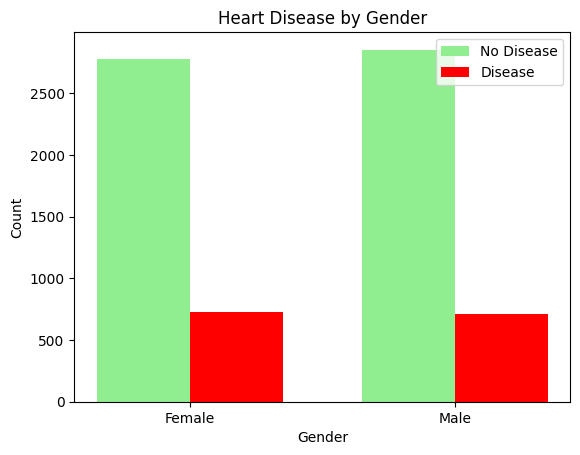

In [19]:
no_disease_male = len(df[(df['Gender']==1) & (df['Heart Disease Status']==0)])
disease_male = len(df[(df['Gender']==1) & (df['Heart Disease Status']==1)])
no_disease_female = len(df[(df['Gender']==0) & (df['Heart Disease Status']==0)])
disease_female = len(df[(df['Gender']==0) & (df['Heart Disease Status']==1)])

labels = ['Female', 'Male']
no_disease = [no_disease_female, no_disease_male]
disease = [disease_female, disease_male]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, no_disease, width, label='No Disease', color='lightgreen')
plt.bar(x + width/2, disease, width, label='Disease', color='red')

plt.xticks(x, labels)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Disease by Gender')
plt.legend()
plt.show()

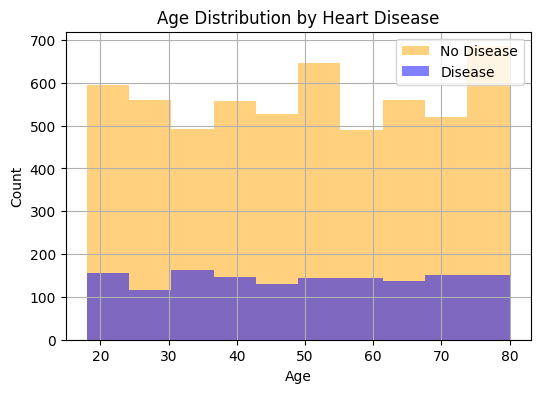

In [ ]:
plt.figure(figsize=(6,4))
df[df["Heart Disease Status"]==0]["Age"].plot(kind="hist", alpha=0.5, label="No Disease",color='orange')
df[df["Heart Disease Status"]==1]["Age"].plot(kind="hist", alpha=0.5, label="Disease",color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Heart Disease")
plt.legend()
plt.grid(True)
plt.show()

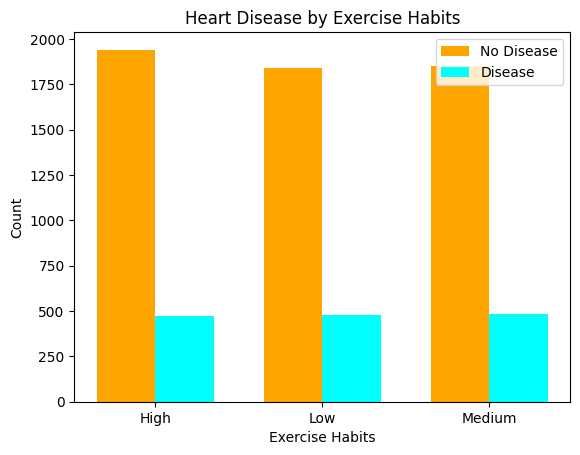

In [ ]:
labels = ['High', 'Low', 'Medium']
no_disease = [
    len(df[(df['Exercise Habits'] == 0) & (df['Heart Disease Status'] == 0)]),
    len(df[(df['Exercise Habits'] == 1) & (df['Heart Disease Status'] == 0)]),
    len(df[(df['Exercise Habits'] == 2) & (df['Heart Disease Status'] == 0)])
]
disease = [
    len(df[(df['Exercise Habits'] == 0) & (df['Heart Disease Status'] == 1)]),
    len(df[(df['Exercise Habits'] == 1) & (df['Heart Disease Status'] == 1)]),
    len(df[(df['Exercise Habits'] == 2) & (df['Heart Disease Status'] == 1)])
]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, no_disease, width, label='No Disease', color='orange')
plt.bar(x + width/2, disease, width, label='Disease', color='cyan')

plt.xticks(x, labels)
plt.xlabel('Exercise Habits')
plt.ylabel('Count')
plt.title('Heart Disease by Exercise Habits')
plt.legend()
plt.show()


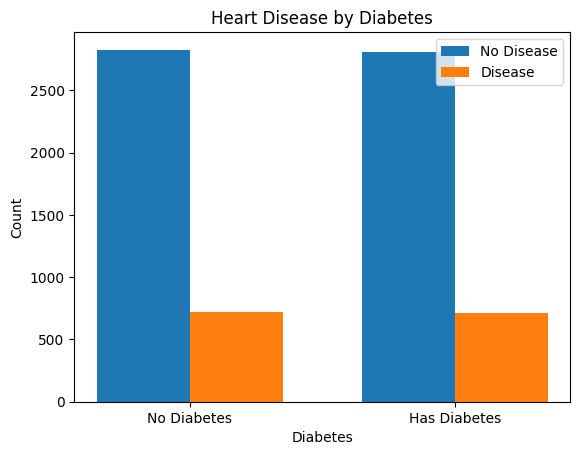

In [ ]:
labels = ['No Diabetes', 'Has Diabetes']
no_disease = [
    len(df[(df['Diabetes'] == 0) & (df['Heart Disease Status'] == 0)]),
    len(df[(df['Diabetes'] == 1) & (df['Heart Disease Status'] == 0)])
]
disease = [
    len(df[(df['Diabetes'] == 0) & (df['Heart Disease Status'] == 1)]),
    len(df[(df['Diabetes'] == 1) & (df['Heart Disease Status'] == 1)])
]

x = np.arange(len(labels))
width = 0.35

plt.bar(x-width/2, no_disease, width, label='No Disease')
plt.bar(x+width/2, disease, width, label='Disease')

plt.xticks(x, labels)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Heart Disease by Diabetes')
plt.legend()
plt.show()

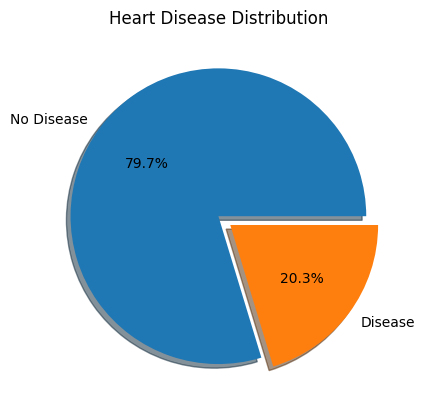

In [ ]:
counts = df['Heart Disease Status'].value_counts()

plt.pie(counts, labels=['No Disease','Disease'],autopct='%1.1f%%',explode=[0,0.1],shadow=True)
plt.title('Heart Disease Distribution')
plt.show()